<a href="https://colab.research.google.com/github/Klu77/project-1-for-Git-tools/blob/main/cost_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)
data
# y = w*x + b
x = data['YearsExperience']
y = data['Salary']

In [5]:
w = 10
b = 0
y_pred = w*x + b
cost = (y - y_pred)**2
cost.sum() / len(x)  # 通常取平均

602.547878787879

In [6]:
def compute_cost(x, y, w, b):
  y_pred = w*x + b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)

  return cost


In [7]:
compute_cost(x, y, 10, 0)

602.547878787879

In [8]:
# b =0 w=-100~100 cost的值是多少
costs = [] #创建一个列表
for w in range(-100, 101):
  cost = compute_cost(x, y, w, 0)
  costs.append(cost)
costs

[420951.08121212124,
 413557.2063636363,
 406228.88242424245,
 398966.1093939394,
 391768.8872727272,
 384637.21606060606,
 377571.0957575757,
 370570.52636363637,
 363635.5078787879,
 356766.0403030302,
 349962.12363636366,
 343223.7578787879,
 336550.94303030305,
 329943.6790909091,
 323401.966060606,
 316925.8039393939,
 310515.19272727263,
 304170.13242424245,
 297890.623030303,
 291676.6645454545,
 285528.25696969696,
 279445.40030303027,
 273428.0945454546,
 267476.33969696966,
 261590.1357575757,
 255769.48272727273,
 250014.38060606056,
 244324.82939393938,
 238700.82909090907,
 233142.3796969697,
 227649.4812121212,
 222222.13363636364,
 216860.33696969692,
 211564.0912121212,
 206333.39636363636,
 201168.25242424244,
 196068.6593939394,
 191034.61727272722,
 186066.12606060607,
 181163.18575757576,
 176325.79636363636,
 171553.95787878786,
 166847.67030303032,
 162206.93363636362,
 157631.7478787879,
 153122.113030303,
 148678.02909090905,
 144299.49606060603,
 139986.5139393

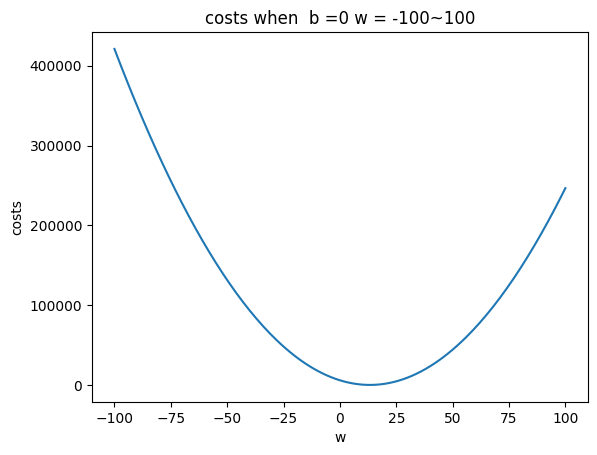

In [9]:
import matplotlib.pyplot as plt

#plt.scatter(range(-100, 101), costs)
plt.plot(range(-100, 101), costs)
plt.title("costs when  b =0 w = -100~100")
plt.xlabel("w")
plt.ylabel("costs")
plt.show()


In [10]:
# w=-100~100 b=-100~100 的cost
import numpy as np

np.set_printoptions(precision=2) #设定小数点位数

ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j = j+1
  i = i +1

costs

array([[543097.75, 541777.28, 540458.81, ..., 320651.35, 319726.88,
        318804.41],
       [534727.51, 533416.81, 532108.1 , ..., 314214.31, 313299.61,
        312386.9 ],
       [526422.82, 525121.88, 523822.94, ..., 307842.82, 306937.88,
        306034.94],
       ...,
       [164229.91, 164842.64, 165457.37, ..., 324557.11, 325565.84,
        326576.57],
       [168838.75, 169461.25, 170085.74, ..., 331099.15, 332117.65,
        333138.14],
       [173513.14, 174145.4 , 174779.66, ..., 337706.74, 338735.  ,
        339765.26]])

[9] [29]
when w = [9], b = [29] will be the minimum cost: [32.69]


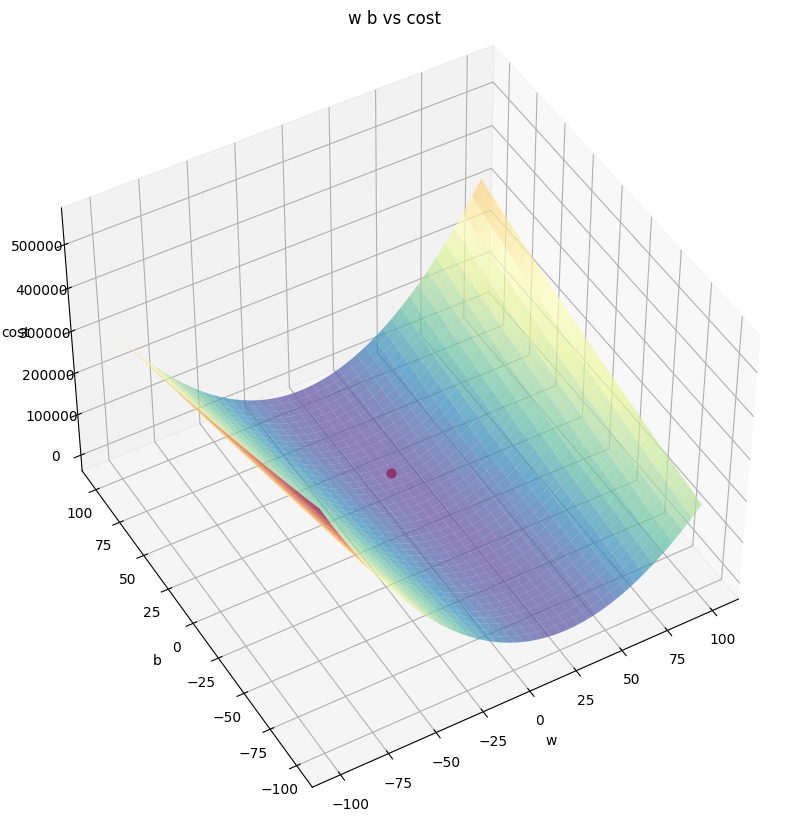

In [29]:
#把图放大一点
plt.figure(figsize=(12,10))

ax = plt.axes(projection = "3d")

ax.view_init(45, -120)  #3d图的转动角度设定

b_grid, w_grid = np.meshgrid(bs, ws)

ax.plot_surface(w_grid, b_grid, costs, cmap= "Spectral_r", alpha = 0.7)

ax.set_title("w b vs cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

#下面是找出最小的cost的代码
#请注意，这里的w_index和b_index是下标，而不是cost最小的w和b的值，用where找出的才是cost 最小的时候的w和b的值

w_index, b_index = np.where(costs == np.min(costs)) #为什么用索引，是因为costs是一个二维数组，用np.where 会返回一个索引
#ax.scatter(ws[w_index])
#print(np.min(costs)) # print the minimum value of cost

#print(w_index, b_index)



#打印cost最小时w和b的值
print(ws[w_index], bs[b_index])

#把最小cost那个值的点设成红色，且大一点
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s =40)

#print(f"when w = {ws[w_index]}, bs{[b_index]} will be the minimum cost:{costs[w_index, b_index]")
print(f"when w = {ws[w_index]}, b = {bs[b_index]} will be the minimum cost: {costs[w_index, b_index]}")
plt.show()
